# **Geospatial Distribution of Severe Housing Insecurity in the Greater Sacramento Area**
### by Sandra J. Garren, Ph.D.

This analysis provides the python workflow to show the current geospatial distribution of severe housing insecurity of homeowners and renters in the Sacramento-Roseville, CA Combined Statistical Area (CSA). The analysis uses Censusdis to obtain and map housing insecurity at the census tract level for the combined total of homeowners with and without a mortgage and from renters across the CSA for the year 2021. 

1.  Install censisdis into python
2.  Define "Housing Insecurity" and identify data
3.  Define geographic boundaries
4.  Map the housing data

####
#### **Step 1. Install "censusdis" into python**

In [4]:
pip install censusdis

Note: you may need to restart the kernel to use updated packages.


####
#### **Step 2. Define "Severe Housing Insecurity" and identify data**
Moderate housing insecurity is defined as total households that spend between 30% and 50% of housing costs as a percentage of income. Severe housing insecurity is defined as total households that spend above 50% of income on housing. The US Census collects data for homeowners with/without a mortgage and for renters. The data was queried in censusdis to identify the group code and exact data column numbers for these three variables for totals.

#####
##### *2a. Housing insecurity between 30% and 50% AND over 50% for homeowners with and without a mortgage*

In [5]:
import censusdis.data as ced
DATASET = 'acs/acs5'
VINTAGE = 2021

In [17]:
df_groups_SMOCAPI = ced.variables.all_groups(DATASET, VINTAGE)

In [18]:
df_groups_SMOCAPI[
    df_groups_SMOCAPI['DESCRIPTION'].str.contains('SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE')
]

,DATASET,YEAR,GROUP,DESCRIPTION
815,acs/acs5,2021,B25091,MORTGAGE STATUS BY SELECTED MONTHLY OWNER COST...
816,acs/acs5,2021,B25092,MEDIAN SELECTED MONTHLY OWNER COSTS AS A PERCE...
817,acs/acs5,2021,B25093,AGE OF HOUSEHOLDER BY SELECTED MONTHLY OWNER C...
819,acs/acs5,2021,B25095,HOUSEHOLD INCOME BY SELECTED MONTHLY OWNER COS...


In [19]:
GROUP1 = 'B25091'

In [10]:
ced.variables.group_tree(DATASET, VINTAGE, GROUP1)

+ Estimate
    + Total: (B25091_001E)
        + Housing units with a mortgage: (B25091_002E)
            + Less than 10.0 percent (B25091_003E)
            + 10.0 to 14.9 percent (B25091_004E)
            + 15.0 to 19.9 percent (B25091_005E)
            + 20.0 to 24.9 percent (B25091_006E)
            + 25.0 to 29.9 percent (B25091_007E)
            + 30.0 to 34.9 percent (B25091_008E)
            + 35.0 to 39.9 percent (B25091_009E)
            + 40.0 to 49.9 percent (B25091_010E)
            + 50.0 percent or more (B25091_011E)
            + Not computed (B25091_012E)
        + Housing units without a mortgage: (B25091_013E)
            + Less than 10.0 percent (B25091_014E)
            + 10.0 to 14.9 percent (B25091_015E)
            + 15.0 to 19.9 percent (B25091_016E)
            + 20.0 to 24.9 percent (B25091_017E)
            + 25.0 to 29.9 percent (B25091_018E)
            + 30.0 to 34.9 percent (B25091_019E)
            + 35.0 to 39.9 percent (B25091_020E)
            + 40.0 t

In [20]:
TOTAL_HOMEOWNERS=['B25091_001']
TOTAL_OWN_INS=['B25091_003E','B25091_004E','B25091_005E','B25091_006E','B25091_007E','B25091_008E','B25091_009E','B25091_010','B25091_011E','B25091_014E','B25091_015','B25091_016E','B25091_017E','B25091_018E','B25091_019E','B25091_020E','B25091_021E','B25091_022']
TOTAL_OWN_INS_30_50=['B25091_008E', 'B25091_009', 'B25091_010E','B25091_019E', 'B25091_020E','B25091_021E']
TOTAL_OWN_INS_50=['B25091_011E','B25091_022E']

##### 
##### 2b. Housing insecurity between 30% and 50% AND over 50% for renters

In [21]:
DATASET = 'acs/acs5'
VINTAGE = 2021

In [22]:
df_groups_GRAPI = ced.variables.all_groups(DATASET, VINTAGE)

In [23]:
df_groups_GRAPI[
    df_groups_GRAPI['DESCRIPTION'].str.contains('GROSS RENT AS A PERCENTAGE')
]

,DATASET,YEAR,GROUP,DESCRIPTION
796,acs/acs5,2021,B25070,GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME...
797,acs/acs5,2021,B25071,MEDIAN GROSS RENT AS A PERCENTAGE OF HOUSEHOLD...
798,acs/acs5,2021,B25072,AGE OF HOUSEHOLDER BY GROSS RENT AS A PERCENTA...
799,acs/acs5,2021,B25074,HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE...


In [24]:
GROUP2='B25070'

In [25]:
ced.variables.group_tree(DATASET, VINTAGE, GROUP2)

+ Estimate
    + Total: (B25070_001E)
        + Less than 10.0 percent (B25070_002E)
        + 10.0 to 14.9 percent (B25070_003E)
        + 15.0 to 19.9 percent (B25070_004E)
        + 20.0 to 24.9 percent (B25070_005E)
        + 25.0 to 29.9 percent (B25070_006E)
        + 30.0 to 34.9 percent (B25070_007E)
        + 35.0 to 39.9 percent (B25070_008E)
        + 40.0 to 49.9 percent (B25070_009E)
        + 50.0 percent or more (B25070_010E)
        + Not computed (B25070_011E)

In [26]:
TOTAL_RENTERS=['B25070_001E']
TOTAL_RENT_INS=['B25070_002','B25070_003E','B25070_004E','B25070_005E','B25070_006E','B25070_007E','B25070_008E','B25070_OO9E','B25070_010E']
TOTAL_RENT_INS_30_50=['B25070_007E','B25070_008E','B25070_009E']
TOTAL_RENT_INS_50=['B25070_010E']

In [32]:
VARS_INS_30_50=['B25091_008E', 'B25091_009', 'B25091_010E','B25091_019E', 'B25091_020E','B25091_021E','B25070_007E','B25070_008E','B25070_009E']
VARS_INS_50=['B25091_011E','B25091_022E','B25070_011E']
VARS_INS=['B25091_003E','B25091_004E','B25091_005E','B25091_006E','B25091_007E','B25091_008E','B25091_009E','B25091_010','B25091_011E','B25091_014E','B25091_015','B25091_016E','B25091_017E','B25091_018E','B25091_019E','B25091_020E','B25091_021E','B25091_022','B25070_002','B25070_003E','B25070_004E','B25070_005E','B25070_006E','B25070_007E','B25070_008E','B25070_OO9E','B25070_010E']

####
#### **Step 3. Define Geography** 

In [27]:
import censusdis.geography as cgeo

specs = cgeo.geo_path_snake_specs(DATASET, VINTAGE)

In [36]:
df_CA = ced.download(
    DATASET,
    VINTAGE,
    ['NAME'] + VARS_INS_50,
    state="*"
)

In [37]:
df_CA

,STATE,NAME,B25091_011E,B25091_022E,B25070_011E
0,01,Alabama,67696,26221,76326
1,02,Alaska,10761,4031,8167
2,04,Arizona,116400,35602,62531
3,05,Arkansas,34343,14609,45031
4,06,California,797649,169944,293452
5,08,Colorado,107205,22303,36467
6,09,Connecticut,77497,26787,27692
7,10,Delaware,18703,5449,6389
8,11,District of Columbia,10592,2011,9740
9,12,Florida,432482,172387,176223


In [38]:
df_CA[df_CA['NAME'].str.startswith('California')] 

,STATE,NAME,B25091_011E,B25091_022E,B25070_011E
4,06,California,797649,169944,293452


In [45]:
CA='06'

In [48]:
df_csa = ced.download(
    DATASET,
    VINTAGE,
    ['NAME'] + VARS_INS_50,
    combined_statistical_area="*"
)

In [49]:
df_csa

,COMBINED_STATISTICAL_AREA,NAME,B25091_011E,B25091_022E,B25070_011E
0,104,"Albany-Schenectady, NY CSA",15944,6642,9174
1,106,"Albuquerque-Santa Fe-Las Vegas, NM CSA",23624,6782,13009
2,107,"Altoona-Huntingdon, PA CSA",1924,956,2042
3,108,"Amarillo-Pampa-Borger, TX CSA",3534,1895,3432
4,118,"Appleton-Oshkosh-Neenah, WI CSA",4116,1551,2241
...,...,...,...,...,...
170,548,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA...",164186,35868,61490
171,554,"Wausau-Stevens Point-Wisconsin Rapids, WI CSA",3445,1481,2130
172,556,"Wichita-Winfield, KS CSA",6775,2836,5325
173,558,"Williamsport-Lock Haven, PA CSA",2282,986,1365


In [50]:
df_csa[df_csa['NAME'].str.startswith('Sacramento')] 

,COMBINED_STATISTICAL_AREA,NAME,B25091_011E,B25091_022E,B25070_011E
144,472,"Sacramento-Roseville, CA CSA",53128,12704,19372


In [51]:
CSA_SAC = '472'

In [52]:
gdf_sac = ced.download(
    DATASET,
    VINTAGE,
    ['NAME'] + VARS_INS_50,
    
    combined_statistical_area=CSA_SAC,
    
    with_geometry=True
)

In [53]:
gdf_sac

,COMBINED_STATISTICAL_AREA,NAME,B25091_011E,B25091_022E,B25070_011E,geometry
0,472,"Sacramento-Roseville, CA CSA",53128,12704,19372,"POLYGON ((-122.42149 38.90233, -122.42190 38.9..."


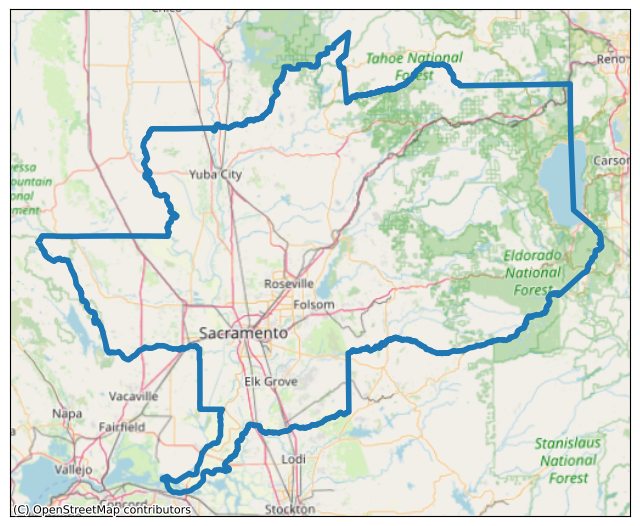

In [54]:
import censusdis.maps as cem

ax = cem.plot_map(
    gdf_sac.boundary,
    
    figsize=(8,8),
    linewidth=4,
    
    # Add a background map from OpenStreetMaps
    # so we can easily verify the geography.
    with_background=True,
)

In [55]:
gdf_sac_tracts = ced.download(
    dataset=DATASET,
    vintage=VINTAGE,
    download_variables=['NAME'] + VARS_INS_50,
    
    state=CA,
    tract="*",
    
    with_geometry=True
)

In [56]:
gdf_sac_tracts

,STATE,COUNTY,TRACT,NAME,B25091_011E,B25091_022E,B25070_011E,geometry
0,06,001,400100,"Census Tract 4001, Alameda County, California",267,15,7,"POLYGON ((-122.24691 37.88535, -122.24197 37.8..."
1,06,001,400200,"Census Tract 4002, Alameda County, California",63,6,0,"POLYGON ((-122.25742 37.84310, -122.25620 37.8..."
2,06,001,400300,"Census Tract 4003, Alameda County, California",53,19,34,"POLYGON ((-122.26416 37.84000, -122.26186 37.8..."
3,06,001,400400,"Census Tract 4004, Alameda County, California",85,0,0,"POLYGON ((-122.26180 37.84179, -122.26130 37.8..."
4,06,001,400500,"Census Tract 4005, Alameda County, California",240,27,15,"POLYGON ((-122.26941 37.84811, -122.26837 37.8..."
...,...,...,...,...,...,...,...,...
9124,06,115,040902,"Census Tract 409.02, Yuba County, California",0,0,54,"POLYGON ((-121.47709 39.14366, -121.46775 39.1..."
9125,06,115,041001,"Census Tract 410.01, Yuba County, California",229,13,105,"POLYGON ((-121.63631 39.24941, -121.63581 39.2..."
9126,06,115,041002,"Census Tract 410.02, Yuba County, California",149,62,173,"POLYGON ((-121.46947 39.33348, -121.46865 39.3..."
9127,06,115,041101,"Census Tract 411.01, Yuba County, California",56,30,99,"POLYGON ((-121.37257 39.37358, -121.37048 39.3..."


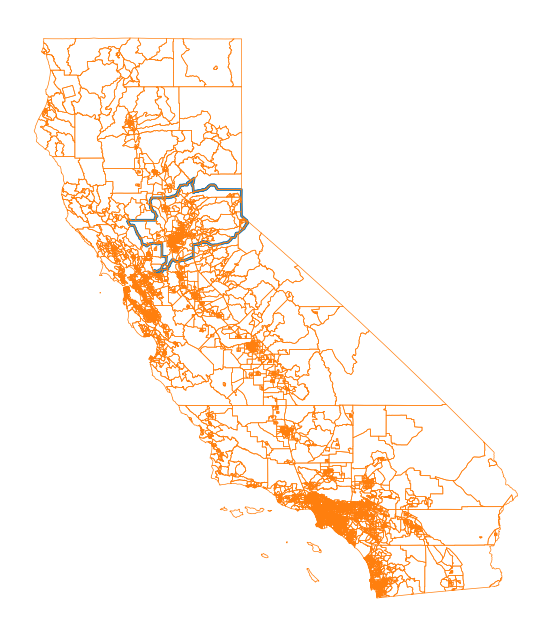

In [57]:
ax = gdf_sac.boundary.plot(
    linewidth=2,
    figsize=(8, 8)
)

ax = gdf_sac_tracts.boundary.plot(
    color='C1',
    linewidth=0.5,
    ax=ax
)

_ = ax.axis('off')

In [58]:
gdf_sac_tracts = cem.sjoin_mostly_contains(
    gdf_large_geos=gdf_sac[['geometry']].copy(),
    gdf_small_geos=gdf_sac_tracts
)

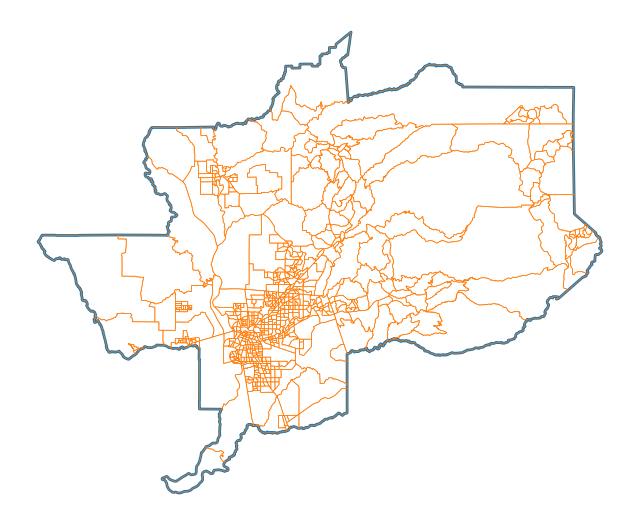

In [59]:
ax = gdf_sac.boundary.plot(
    linewidth=2,
    figsize=(8,8)
)

ax = gdf_sac_tracts.boundary.plot(
    color='C1',
    linewidth=0.5,
    ax=ax
)

_ = ax.axis('off')

####
#### **Step 4. Map the housing data**

In [60]:
gdf_sac_tracts['TOTAL_INS_50'] = gdf_sac_tracts[
    VARS_INS_50
].sum(axis='columns')

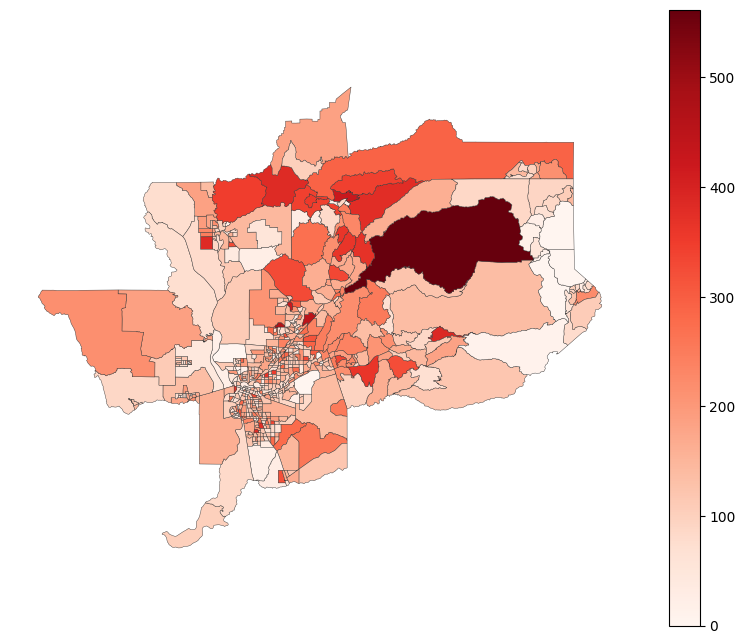

In [61]:
ax = gdf_sac_tracts.plot(
    'TOTAL_INS_50',
    
    cmap='Reds',
    edgecolor='#333',
    linewidth=0.3,
        
    legend=True,
    
    figsize=(10, 8)
)

_ = ax.axis('off')

In [62]:
gdf_top_20 = gdf_sac_tracts.nlargest(
    20, 'TOTAL_INS_50'
)[['NAME', 'TOTAL_INS_50', 'geometry']].reset_index(drop=True)

gdf_top_20

,NAME,TOTAL_INS_50,geometry
0,"Census Tract 202, Placer County, California",562,"POLYGON ((-121.04110 38.92612, -121.04099 38.9..."
1,"Census Tract 231, Placer County, California",463,"POLYGON ((-121.35232 38.79815, -121.34944 38.7..."
2,"Census Tract 212.03, Placer County, California",449,"POLYGON ((-121.22887 38.80062, -121.22886 38.8..."
3,"Census Tract 8.02, Nevada County, California",425,"POLYGON ((-121.09122 39.27860, -121.08555 39.2..."
4,"Census Tract 237, Placer County, California",418,"POLYGON ((-121.29771 38.87398, -121.29418 38.8..."
5,"Census Tract 313.02, El Dorado County, California",390,"POLYGON ((-120.66190 38.75792, -120.66038 38.7..."
6,"Census Tract 505.04, Sutter County, California",385,"POLYGON ((-121.68937 39.09795, -121.68930 39.1..."
7,"Census Tract 410.02, Yuba County, California",384,"POLYGON ((-121.46947 39.33348, -121.46865 39.3..."
8,"Census Tract 96.43, Sacramento County, California",383,"POLYGON ((-121.44723 38.42859, -121.44705 38.4..."
9,"Census Tract 7.01, Nevada County, California",378,"POLYGON ((-121.03100 39.24155, -121.02734 39.2..."


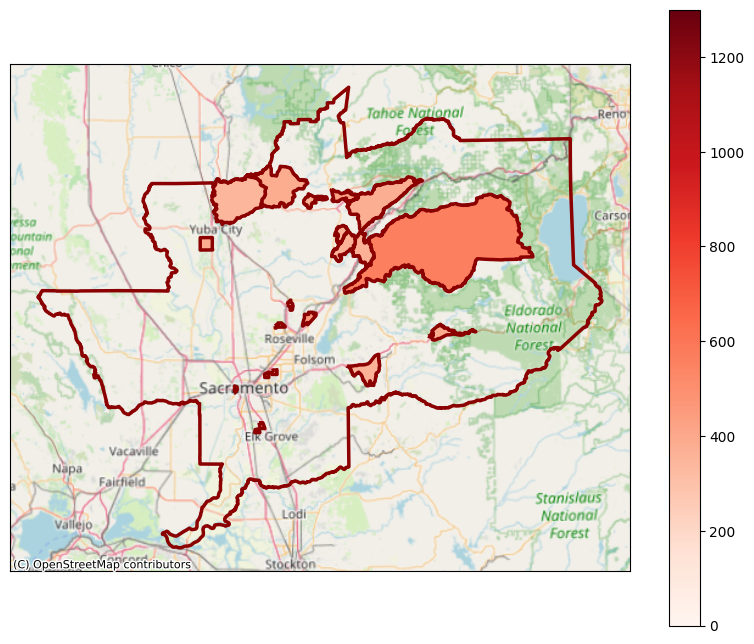

In [63]:
ax = cem.plot_map(
    gdf_top_20,
    'TOTAL_INS_50',
    
    cmap='Reds',
    edgecolor='darkred', 
    linewidth=2.5,
                
    vmin=0,
    vmax=1300,
    legend=True,
    
    figsize=(10, 8)
)

ax = cem.plot_map(
    gdf_sac.boundary,
    edgecolor="darkred",
    linewidth=2.5,
    ax=ax,
    with_background=True
)